# Chapter 16: Deep Learning

### Convolutional Neural Networks

16. 1 ***(Image Recognition: The Fashion-MNIST Dataset)*** Keras comes bundled with the
Fashion-MNIST database of fashion articles which, like the MNIST digits dataset, provides 28-by-28 grayscale images. Fashion-MNIST contains clothing-article images labeled in 10 categories— 0 (T-shirt/top), 1 (Trouser), 2 (Pullover), 3 (Dress), 4 (Coat), 5 (Sandal), 6 (Shirt), 7 (Sneaker), 8 (Bag), 9 (Ankle boot)—with 60,000 training samples and 10,000 testing samples. Modify this chapter's convnet example to load and process Fashion-MNIST.

In [157]:
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

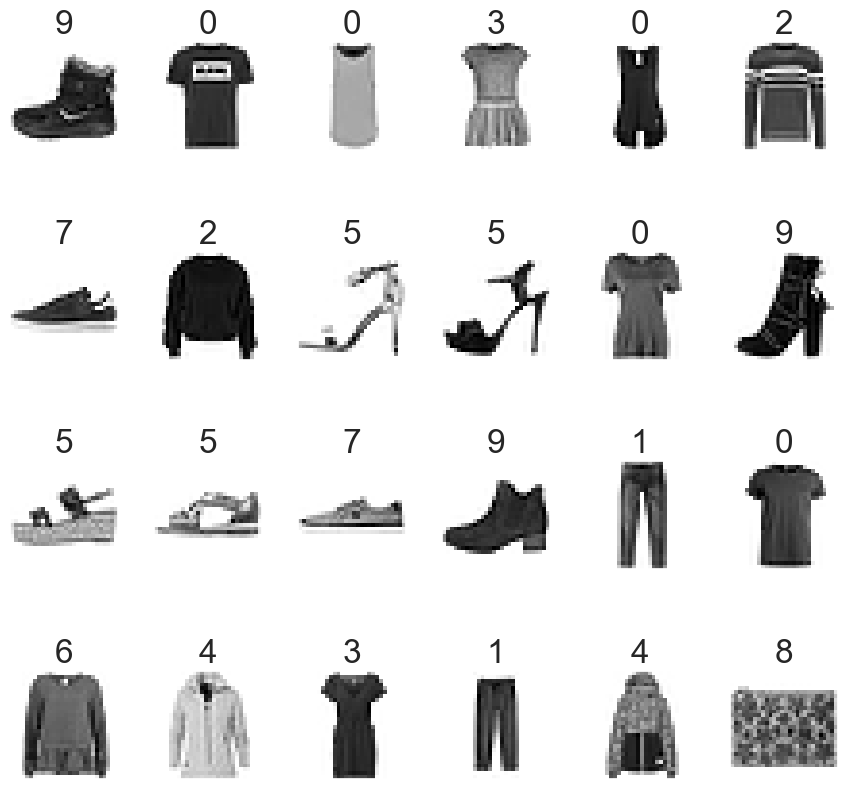

In [159]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

sns.set(font_scale=2)


index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([]) 
    axes.set_title(target)
plt.tight_layout()

In [160]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3200)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [161]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

display(accuracy)
display(loss)

Epoch 1/5
844/844 [==============================] - 49s 57ms/step - loss: 0.4693 - accuracy: 0.8306 - val_loss: 0.3642 - val_accuracy: 0.8598
Epoch 2/5
844/844 [==============================] - 45s 53ms/step - loss: 0.3070 - accuracy: 0.8886 - val_loss: 0.2830 - val_accuracy: 0.8943
Epoch 3/5
844/844 [==============================] - 45s 53ms/step - loss: 0.2588 - accuracy: 0.9062 - val_loss: 0.2583 - val_accuracy: 0.9033
Epoch 4/5
844/844 [==============================] - 45s 53ms/step - loss: 0.2270 - accuracy: 0.9166 - val_loss: 0.2349 - val_accuracy: 0.9152
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2805 - accuracy: 0.8958


0.895799994468689

0.2805018723011017

In [162]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

predictions = cnn.predict(X_test)

display(y_test[0])

for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    

313/313 [==============================] - 3s 9ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

0: 0.0001234382%
1: 0.0000023900%
2: 0.0000816584%
3: 0.0000255219%
4: 0.0000108866%
5: 0.0189171085%
6: 0.0000062123%
7: 0.1277787494%
8: 0.0031386313%
9: 99.8499155045%


In [163]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
        
print(len(incorrect_predictions))

1042


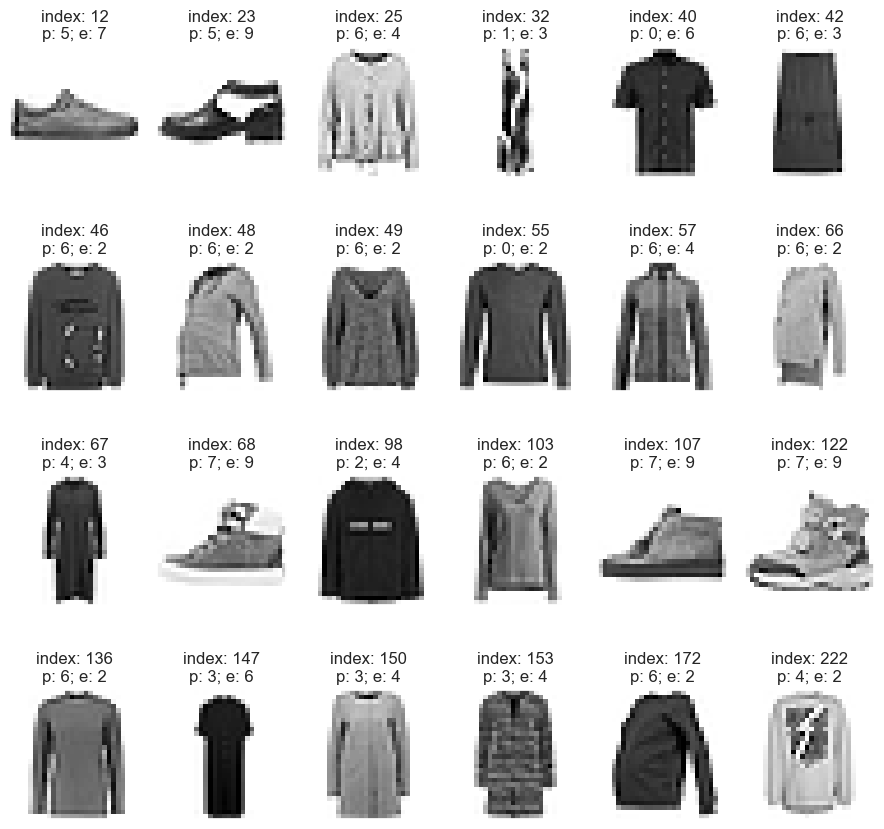

In [164]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 9))
sns.set(font_scale=1)
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [165]:
#Exercise 16.1: Image Recognition: The Fashion-MNIST Dataset

def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
        
        
display_probabilities(predictions[495])
print()
display_probabilities(predictions[583])
print()
display_probabilities(predictions[625])

# cnn.save('mnist_cnn.h5')



0: 0.0035537545%
1: 0.0000565394%
2: 0.0019018649%
3: 0.0015912545%
4: 0.0001255735%
5: 59.8455548286%
6: 0.0004691818%
7: 0.0312540506%
8: 0.0004311859%
9: 40.1150614023%

0: 0.0000003906%
1: 0.0000000072%
2: 0.0000011483%
3: 0.0000309998%
4: 0.0000039612%
5: 0.0000135628%
6: 0.0000003153%
7: 0.2319233492%
8: 0.0002360327%
9: 99.7677862644%

0: 99.5165348053%
1: 0.0001129785%
2: 0.0038271584%
3: 0.0038556747%
4: 0.0001968114%
5: 0.0000789557%
6: 0.4753523972%
7: 0.0000068631%
8: 0.0000146745%
9: 0.0000113823%


16. 2 ***(MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size)***
In the MNIST convnet we presented, change the kernel size from 3-by-3 to 5-by-5. Reexecute the model.

In [167]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size


from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

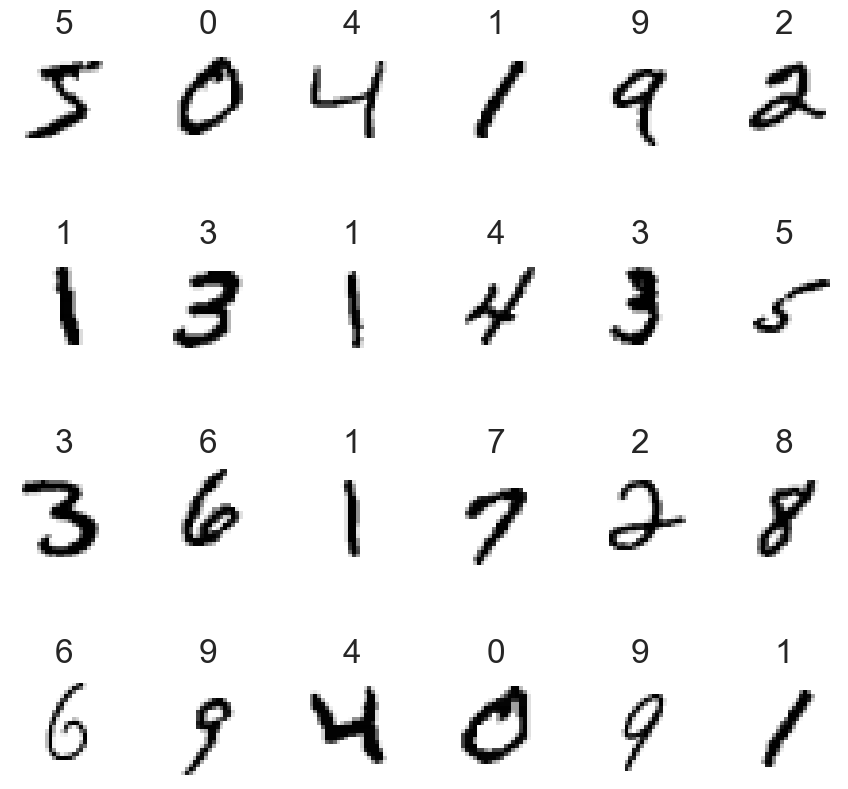

In [170]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

(X_train, y_train), (X_test, y_test) = mnist.load_data()

sns.set(font_scale=2)

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)
    
plt.tight_layout()


In [171]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [172]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

display(accuracy)
display(loss)


Epoch 1/5
844/844 [==============================] - 51s 59ms/step - loss: 0.1401 - accuracy: 0.9567 - val_loss: 0.0468 - val_accuracy: 0.9867
Epoch 2/5
844/844 [==============================] - 48s 57ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 3/5
844/844 [==============================] - 47s 56ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0305 - val_accuracy: 0.9917
Epoch 4/5
844/844 [==============================] - 47s 56ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0298 - val_accuracy: 0.9915
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0276 - accuracy: 0.9927


0.9926999807357788

0.027568701654672623

In [173]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

predictions = cnn.predict(X_test)

display(y_test[0])

for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

313/313 [==============================] - 3s 10ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

0: 0.0000000047%
1: 0.0000001992%
2: 0.0000001346%
3: 0.0000002132%
4: 0.0000000001%
5: 0.0000000067%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000273%
9: 0.0000001827%


In [174]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
        
print(len(incorrect_predictions))

73


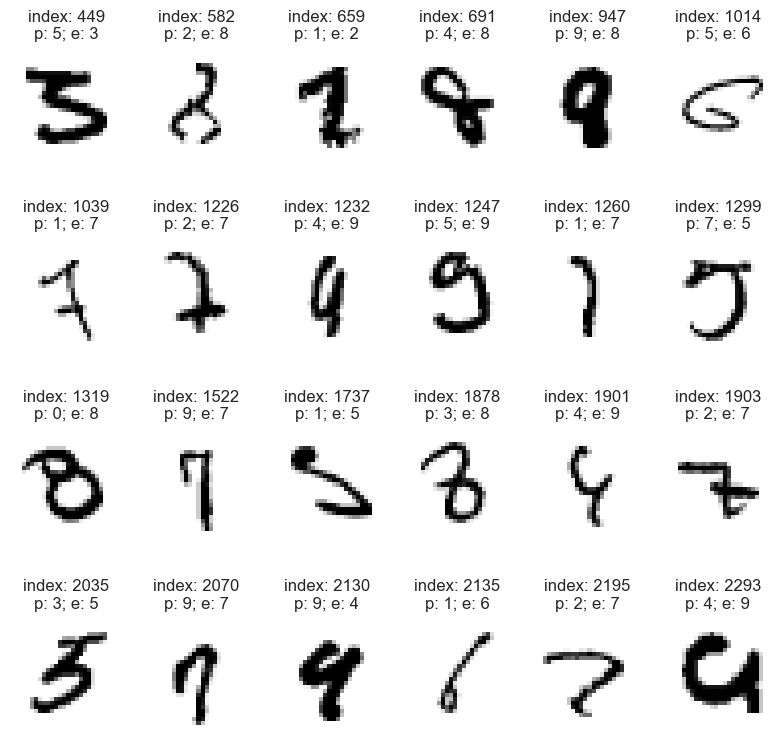

In [176]:
#Exercise 16.2: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Kernel Size

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8))
sns.set(font_scale=1)

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

16. 3 ***(MNIST Handwritten Digits Hyperparameter Tuning: Changing the Batch Size)***
In the MNIST convnet we presented, we used a training batch size of 64. Larger batch
sizes can decrease model accuracy. Re-execute the model for batch sizes of 32 and 128.
How do these values change the prediction accuracy?

In [177]:
#Exercise 16.3: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Batch Size

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [178]:
#Exercise 16.3: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Batch Size

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [179]:
#Exercise 16.3: MNIST Handwritten Digits Hyperparameter Tuning: Changing the Batch Size

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)


print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
1688/1688 [==============================] - 62s 36ms/step - loss: 0.1153 - accuracy: 0.9634 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 2/5
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0435 - val_accuracy: 0.9880
Epoch 3/5
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 4/5
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0263 - accuracy: 0.9917

Accuracy: 99.169999%


In [180]:
cnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
422/422 [==============================] - 47s 112ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0310 - val_accuracy: 0.9932
Epoch 2/5
422/422 [==============================] - 46s 109ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0345 - val_accuracy: 0.9937
Epoch 3/5
422/422 [==============================] - 46s 109ms/step - loss: 5.0903e-04 - accuracy: 0.9999 - val_loss: 0.0363 - val_accuracy: 0.9933
Epoch 4/5
422/422 [==============================] - 46s 109ms/step - loss: 2.4703e-04 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9937
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0228 - accuracy: 0.9945

Accuracy: 99.449998%


16. 4 ***(Convnet Layers)*** Remove the first *Dense* layer in this chapter's convnet model.
How does this change the prediction accuracy? Several Keras pretrained convnets contain
Dense layers with 4096 neurons. Add such a layer before the two *Dense* layers in this chapter's convnet model. How does this change the prediction accuracy?

In [37]:
#Exercise 16.4: Convnet Layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D


In [38]:
#Exercise 16.4: Convnet Layers


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())

# cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3200)              0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [39]:
#Exercise 16.4: Convnet Layers

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
844/844 [==============================] - 41s 48ms/step - loss: 0.1689 - accuracy: 0.9509 - val_loss: 0.0626 - val_accuracy: 0.9840
Epoch 2/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0403 - val_accuracy: 0.9878
Epoch 3/5
844/844 [==============================] - 43s 50ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0383 - val_accuracy: 0.9893
Epoch 4/5
844/844 [==============================] - 42s 50ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0387 - val_accuracy: 0.9882
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0318 - accuracy: 0.9892

Accuracy: 98.920000%


In [40]:
#Exercise 16.4: Convnet Layers


cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())

cnn.add(Dense(units=4096, activation='relu'))

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_13 (Dense)            (None, 4096)             

In [41]:
#Exercise 16.4: Convnet Layers

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
844/844 [==============================] - 166s 196ms/step - loss: 0.1159 - accuracy: 0.9639 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 2/5
844/844 [==============================] - 162s 191ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 3/5
844/844 [==============================] - 173s 205ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0362 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 182s 215ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0384 - val_accuracy: 0.9920
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 0.0325 - accuracy: 0.9915

Accuracy: 99.150002%


16. 5 ***(Does the Size of the Training Data Set Matter?)*** Rerun the MNIST convnet model with only 25% of the original training dataset, then 50%, then 75%. Use scikit-learn's *train_test_split* function to randomly select the training dataset items. Compare the results to when you trained the model with the complete training dataset.

In [136]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np     

In [137]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))


In [138]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

# Training the model with 25% of the data #

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train = np.vstack((X_train, X_test)), np.hstack((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=11, train_size=0.25)

X_train = X_train.reshape((int(70_000 * 0.25) , 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((int(70_000 * 0.75), 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [139]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
247/247 [==============================] - 14s 52ms/step - loss: 0.2970 - accuracy: 0.9098 - val_loss: 0.0866 - val_accuracy: 0.9714
Epoch 2/5
247/247 [==============================] - 13s 52ms/step - loss: 0.0762 - accuracy: 0.9753 - val_loss: 0.0747 - val_accuracy: 0.9743
Epoch 3/5
247/247 [==============================] - 15s 59ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.0632 - val_accuracy: 0.9806
Epoch 4/5
247/247 [==============================] - 16s 64ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0562 - val_accuracy: 0.9846
Epoch 5/5
1641/1641 [==============================] - 18s 11ms/step - loss: 0.0646 - accuracy: 0.9820

Accuracy: 98.196191%


In [140]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

# Training the model with 50% of the data #
X_test, X_train = X_test.reshape(X_test.shape[:-1]), X_train.reshape(X_train.shape[:-1])  
y_train, y_test = np.argmax(y_train, axis=-1), np.argmax(y_test, axis=-1)

X_, y_ = np.vstack((X_train, X_test)), np.hstack((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split( X_, y_, random_state=11, train_size=0.50)

X_train = X_train.reshape((int(70_000 * 0.50), 28, 28, 1)) 

X_test = X_test.reshape((int(70_000 * 0.50), 28, 28, 1))

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [141]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
493/493 [==============================] - 32s 62ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0392 - val_accuracy: 0.9880
Epoch 2/5
493/493 [==============================] - 34s 68ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0332 - val_accuracy: 0.9886
Epoch 3/5
493/493 [==============================] - 30s 60ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0351 - val_accuracy: 0.9891
Epoch 4/5
493/493 [==============================] - 28s 57ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0452 - val_accuracy: 0.9909
Epoch 5/5
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0481 - accuracy: 0.9879

Accuracy: 98.791426%


In [145]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

# Training the model with 75% of the data  #

X_test, X_train = X_test.reshape(X_test.shape[:-1]), X_train.reshape(X_train.shape[:-1])  
y_train, y_test = np.argmax(y_train, axis=-1), np.argmax(y_test, axis=-1)

X_, y_ = np.vstack((X_train, X_test)), np.hstack((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split( X_, y_, random_state=11, train_size=0.75)

X_train = X_train.reshape((int(70_000 * 0.75), 28, 28, 1)) 

X_test = X_test.reshape((int(70_000 * 0.25), 28, 28, 1))

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [146]:
#Exercise 16.5: Does the Size of the Training Data Set Matter?

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
739/739 [==============================] - 44s 58ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0260 - val_accuracy: 0.9939
Epoch 2/5
739/739 [==============================] - 44s 60ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 3/5
739/739 [==============================] - 43s 58ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0339 - val_accuracy: 0.9930
Epoch 4/5
739/739 [==============================] - 45s 61ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0802 - val_accuracy: 0.9838
Epoch 5/5
547/547 [==============================] - 5s 9ms/step - loss: 0.0335 - accuracy: 0.9918

Accuracy: 99.177140%


16. 6 ***(Overfitting)*** If you train and test on the same data, then the model might overfit
the data. Train the MNIST model using all 70,000 training and testing samples, then evaluate the model on the test data and observe the results.

In [68]:
#Exercise 16.6: Overfitting

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
import numpy as np

In [70]:
#Exercise 16.6: Overfitting

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train = np.vstack((X_train, X_test)), np.hstack((y_train, y_test))

X_train = X_train.reshape((70000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))


In [71]:
#Exercise 16.6: Overfitting

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')

Epoch 1/5
985/985 [==============================] - 58s 59ms/step - loss: 0.1302 - accuracy: 0.9590 - val_loss: 0.0338 - val_accuracy: 0.9896
Epoch 2/5
985/985 [==============================] - 54s 54ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0358 - val_accuracy: 0.9873
Epoch 3/5
985/985 [==============================] - 63s 64ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0172 - val_accuracy: 0.9949
Epoch 4/5
985/985 [==============================] - 58s 59ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0178 - accuracy: 0.9940

Accuracy: 99.400002%


16. 7 ***(TensorBoard: Visualizing Deep Learning)*** Use TensorBoard (Section 16.7) to visualize the training and validation accuracy and loss values for this chapter's recurrent neural network. Modify the example to try fewer and more epochs.

16. 8 ***(IMDb Sentiment Analysis: Removing Stop Words)*** In Section 16.9's recurrent neural network example, use the techniques you learned in the "Natural Language Processing" chapter to remove the stop words from the reviews in the training and testing sets.

In [184]:
#Exercise 16.8: IMDb Sentiment Analysis: Removing Stop Words

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords


In [185]:
#Exercise 16.8: IMDb Sentiment Analysis: Removing Stop Words

NUM_WORDS = 10000
INDEX_FROM = 3 #  #word index offset
OFFSET_WORDS = ("<PAD>", "<START>", "<UNK>")

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)

# %pprint

word_to_index = imdb.get_word_index()


index_to_word = {
    index + INDEX_FROM -1: word for (word, index) in word_to_index.items()
    }

index_to_word.update(zip(range(3), OFFSET_WORDS)) # Adding  offset words 


# removing stop words #
stop_words = stopwords.words('english')

for index in filter(lambda x: index_to_word[x] in stop_words, 
                    index_to_word.keys()):
    
    for i in range(X_train.shape[0]):
        
        for n_times in range(X_train[i].count(index)):
            X_train[i].remove(index)
            
        for n_times in range(X_test[i].count(index)):
            X_test[i].remove(index)

In [186]:
#Exercise 16.8: IMDb Sentiment Analysis: Removing Stop Words

words_per_review = 200  

X_train = pad_sequences(X_train, maxlen=words_per_review)
X_test = pad_sequences(X_test, maxlen=words_per_review)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, random_state=11, test_size=0.20) 

In [187]:
#Exercise 16.8: IMDb Sentiment Analysis: Removing Stop Words

rnn = Sequential()

rnn.add(Embedding(input_dim=NUM_WORDS, output_dim=128,
                  input_length=words_per_review))

rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
rnn.add(Dense(units=1, activation='sigmoid'))

rnn.compile(optimizer='adam',
            loss='binary_crossentropy', 
            metrics=['accuracy'])

rnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [189]:
#Exercise 16.8: IMDb Sentiment Analysis: Removing Stop Words

rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

results = rnn.evaluate(X_test, y_test)

results

Epoch 1/5
782/782 [==============================] - 315s 403ms/step - loss: 0.0821 - accuracy: 0.9712 - val_loss: 0.5221 - val_accuracy: 0.8408
Epoch 2/5
782/782 [==============================] - 323s 414ms/step - loss: 0.0520 - accuracy: 0.9823 - val_loss: 0.5938 - val_accuracy: 0.8570
Epoch 3/5
782/782 [==============================] - 329s 420ms/step - loss: 0.0404 - accuracy: 0.9866 - val_loss: 0.6142 - val_accuracy: 0.8476
Epoch 4/5
782/782 [==============================] - 337s 431ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.7459 - val_accuracy: 0.8460
Epoch 5/5
625/625 [==============================] - 31s 50ms/step - loss: 0.6641 - accuracy: 0.8220


[0.664135217666626, 0.8220000267028809]

### ConvnetJS Visualization

16. 10 ***(Run the Demo: Using the ConvnetJS Tool to Visualize an MNIST Convnet)*** Section 16.8 introduced Andrej Karpathy's ConvnetJS browser-based deep-learning tool for training convolutional neural networks and observing their results. Visit the Convnet-JS website at https://cs.stanford.edu/people/karpathy/convnetjs/ and research its capabilities. Run the demo “Classify MNIST digits with a Convolutional Neural Net- work” and study the dashboard outputs described in Section 16.8 to get a better sense of what a convnet sees as it learns. Observe how changing the hyperparameters affects the model's statistics, by modifying the layer parameters in the Instantiate a Network and Train- er section, then click the change network button to begin training with the updated model.

16. 11 ***(Run the Demo: Using the ConvnetJS Tool to Visualize a CIFAR10 Convnet)***
Keras’s bundled CIFAR10 dataset contains 32-by-32 color images. Repeat the preceding
exercise for the demo "Classify CIFAR-10 with Convolutional Neural Network" which
classifies the color images into the categories airplanes, automobiles, birds, cats, deer, dogs,
frogs, horses, ships and trucks.

### Convolutional Neural Network Projects and Research

16. 12 ***(Project: Best MNIST Convnet Architectures)*** Research the best MNIST convnet
architectures and implement them using Keras.

In [13]:
#Exercise 16.12: Best MNIST Convnet Architectures 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import LearningRateScheduler

from sklearn.model_selection import train_test_split



In [2]:
#Exercise 16.12: Best MNIST Convnet Architectures 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
#Exercise 16.12: Best MNIST Convnet Architectures 

cnn = Sequential()

cnn.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))

cnn.add(MaxPooling2D())

cnn.add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
cnn.add(MaxPooling2D(padding='same'))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

In [25]:
#Exercise 16.12: Best MNIST Convnet Architectures 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.333)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

cnn.fit(X_train, y_train, batch_size=80, epochs = 20, 
        validation_data = (X_val, y_val), callbacks=[annealer], verbose=0)

print()
loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')


313/313 [==============================] - 4s 11ms/step - loss: 0.0367 - accuracy: 0.9931

Accuracy: 99.309999%
loss: 3.666285%


16. 13 ***(Project: CIFAR10 Convnet)*** Keras's bundled CIFAR10 dataset contains 32-by-32
color images labeled in 10 categories with 50,000 images for training and 10,000 for testing. Using the convnet techniques you learned in the MNIST case study, build, train and
evaluate a convnet for CIFAR10.

In [80]:

#Exercise 16.13: CIFAR10 Convnet

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt


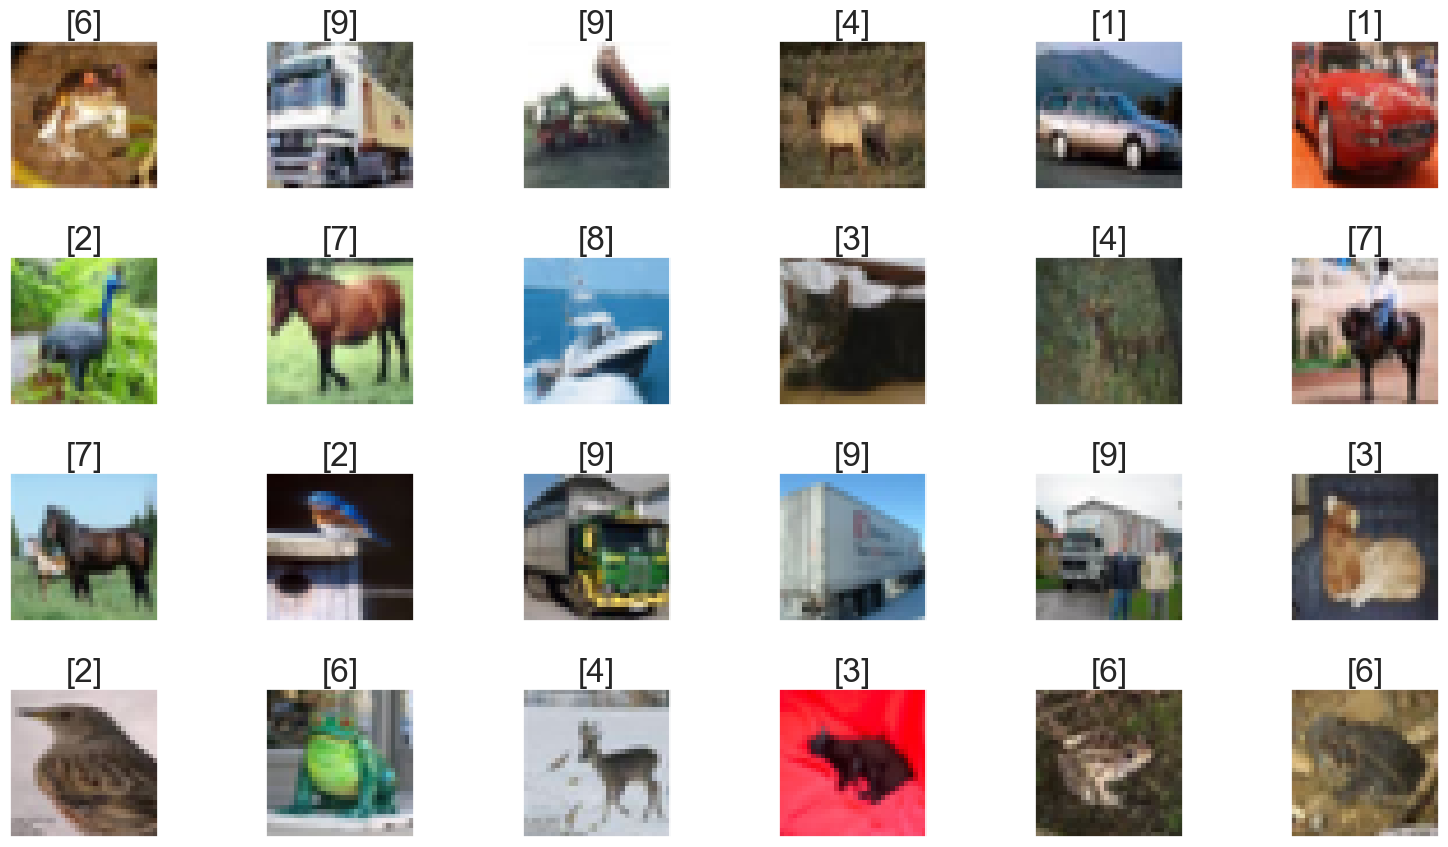

In [82]:
#Exercise 16.13: CIFAR10 Convnet

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)
plt.tight_layout()

In [83]:
#Exercise 16.13: CIFAR10 Convnet

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation='softmax'))
# compile cnn
opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [90]:
#Exercise 16.13: CIFAR10 Convnet

history = cnn.fit(X_train, y_train, 
                  epochs=100, 
                  batch_size=64, 
                  validation_data=(X_test, y_test),
                  verbose=0)

print()
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=0)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')



Accuracy: 83.200002%
loss: 58.296824%


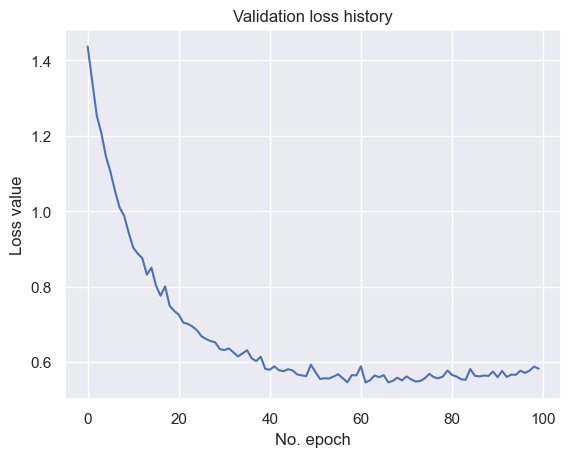

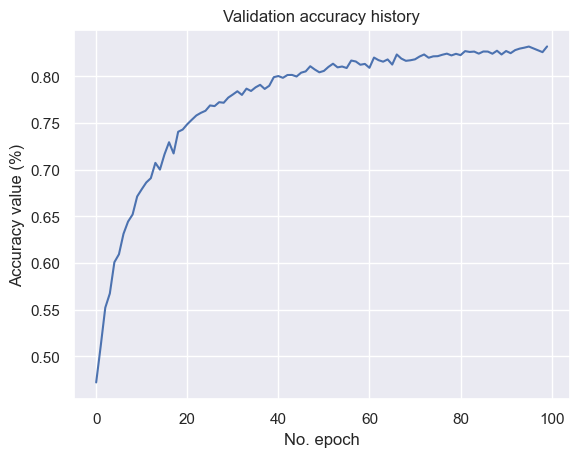

In [98]:
#Exercise 16.13: CIFAR10 Convnet

sns.set(font_scale=1)
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

16. 15 ***(Project: Using Scikit-Learn to Evaluate the MNIST Model's Performance)*** Use
Scikit-learn's classification report and confusion matrix to check this chapter's MNIST model accuracy. Use Seaborn to visualize the confusion matrix.

In [92]:
#Exercise 16.15: Using Scikit-Learn to Evaluate the MNIST Model's Performance

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

from sklearn.metrics import confusion_matrix,  classification_report
from pandas import DataFrame
import seaborn as sns

In [93]:
#Exercise 16.15: Using Scikit-Learn to Evaluate the MNIST Model's Performance

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [94]:
#Exercise 16.15: Using Scikit-Learn to Evaluate the MNIST Model's Performance

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, 
        y_train, 
        epochs=5, 
        batch_size=64,
        validation_split=0.1, 
        verbose=0)

predicted = cnn.predict(X_test).argmax(axis=-1)
expected = y_test.argmax(axis=-1);

print(f'\nPredicted: {predicted[:20]} \n Expected: {expected[:20]}')

313/313 [==============================] - 3s 8ms/step

Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4] 
 Expected: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



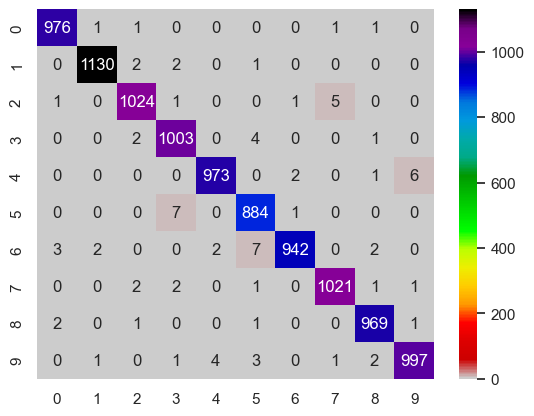

In [97]:
#Exercise 16.15: Using Scikit-Learn to Evaluate the MNIST Model's Performance

confusion_matrix_df = confusion_matrix(y_pred=predicted, y_true=expected);

confusion_matrix_df = DataFrame(data=confusion_matrix_df,
                                   index=range(10), 
                                   columns=range(10)
                                   );

print(classification_report(y_pred=predicted, 
                            y_true=expected, 
                            target_names=list(map(str, set(expected)))
                            ));

sns.set(font_scale=1)
axes = sns.heatmap(data=confusion_matrix_df, 
                   annot=True, 
                   cmap='nipy_spectral_r',
                   fmt='d'
                   );

16. 16 ***(Project: MNIST Handwritten Digits Model Tuning)*** Try adding a third pair of
*Conv2D* and *Pooling* layers to this chapter's convnet just before the *Flatten* layer. Use 256
neurons in the new *Conv2D* layer. How does this affect the model's performance?.

In [1]:
#Exercise 16.16: MNIST Handwritten Digits Model Tuning

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1))) # First Conv2D layer

cnn.add(MaxPooling2D(pool_size=(2, 2))) # First Pooling layer

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) # Second Conv2D layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) # Second Pooling Layer

cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu')) # Third Conv2D layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) # Third Pooling Layer   

cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, 
        y_train, 
        epochs=5, 
        batch_size=64,
        validation_split=0.1, 
        verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0446 - accuracy: 0.9876

Accuracy: 98.760003%
loss: 4.463159%


16. 17 ***(Project: Convnets and Dropout)*** Dropout layers have been shown to reduce overfitting and improve prediction performance. Generally they do this by randomly deactivating a percentage of the neurons in a given layer each time the weights are about to be updated. Dropout following convolutional layers is commonly set to 20–50%. However, the optimal settings vary for each model and dataset. Also, dropout can be applied to other layers. Research the optimal settings for dropout layers and where they're typically placed in a Keras model, then use at least one *Dropout* layer in this chapter's convnet. Does it improve the model's performance?.

In [10]:
#Exercise 16.17: Convnets and Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [11]:
#Exercise 16.17: Convnets and Dropout

cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform', input_shape=(28, 28, 1))) 

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform',  padding='same'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))


cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same')) 

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same')) 

cnn.add(MaxPooling2D(pool_size=(2, 2))) 
cnn.add(Dropout(0.2))


cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same'))

cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform',  padding='same'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))   
cnn.add(Dropout(0.2))


cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=10, activation='softmax'))

opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_30 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

In [12]:
#Exercise 16.17: Convnets and Dropout

cnn.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=64,
        validation_split=0.1, 
        verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

313/313 [==============================] - 14s 45ms/step - loss: 0.0218 - accuracy: 0.9920

Accuracy: 99.199998%
loss: 2.184267%


16. 18 ***(Project: Replacing Pooling Layers with Additional Convnet Layers)*** Though pooling is a common technique to reduce overfitting, some research suggests that additional convolutional layers which use larger strides for their kernels can reduce dimensionality and overfitting without discarding features. Read the research paper "Striving for Simplicity: The All Convolutional Net" at https://arxiv.org/abs/1412.6806, then reimplement this chapter's convnet using only *Conv2D* and *Dense* layers. How does this affect the model's performance?.

In [13]:
#Exercise  16.18: Replacing Pooling Layers with Additional Convnet Layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1))) 
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) 


cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 


cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) 
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) 


cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu')) 
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu')) 

cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=64,
        validation_split=0.1, 
        verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

313/313 [==============================] - 28s 91ms/step - loss: 0.0388 - accuracy: 0.9900

Accuracy: 99.000001%
loss: 3.882014%


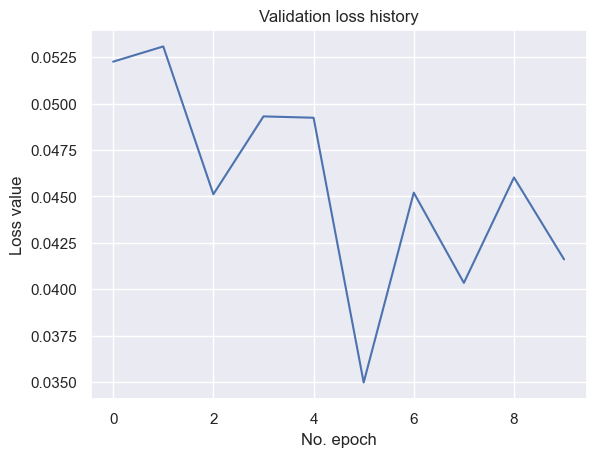

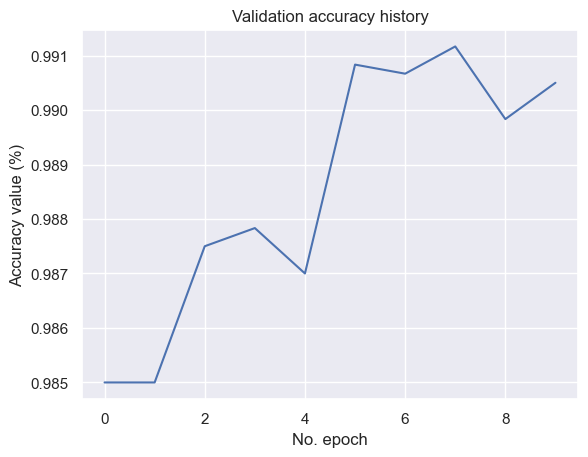

In [16]:
#Exercise  16.18: Replacing Pooling Layers with Additional Convnet Layers

sns.set(font_scale=1)
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

16. 19 ***(Project: EMNIST Handwritten Digits and Characters)*** The EMNIST dataset (https://www.nist.gov/itl/iad/image-group/emnist-dataset) is a more recent version of MNIST. EMNIST has 814,255 digit and character images in 62 *unbalanced classes*, meaning the dataset's samples are not evenly split across the A–Z, a–z and 0–9 classes. The data is provided in a format used by software called Matlab. You can load it into Python via SciPy's *loadmat* function (module *scipy.io*). The downloaded dataset contains several files—one for the entire dataset and several for various subsets.\
Research EMNIST and search for and study existing Python EMNIST deep-learning models. Load the EMNIST data and prepare it for use with Keras. Use scikit-learn's *train_test_split* function to split the data into training, validation and testing sets.
Use 70% of the data for training, 10% for validation and 20% for testing. Reimplement this chapter's MNIST convnet for use with EMNIST and its 62 classes. What prediction accuracy do you get?


In [8]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



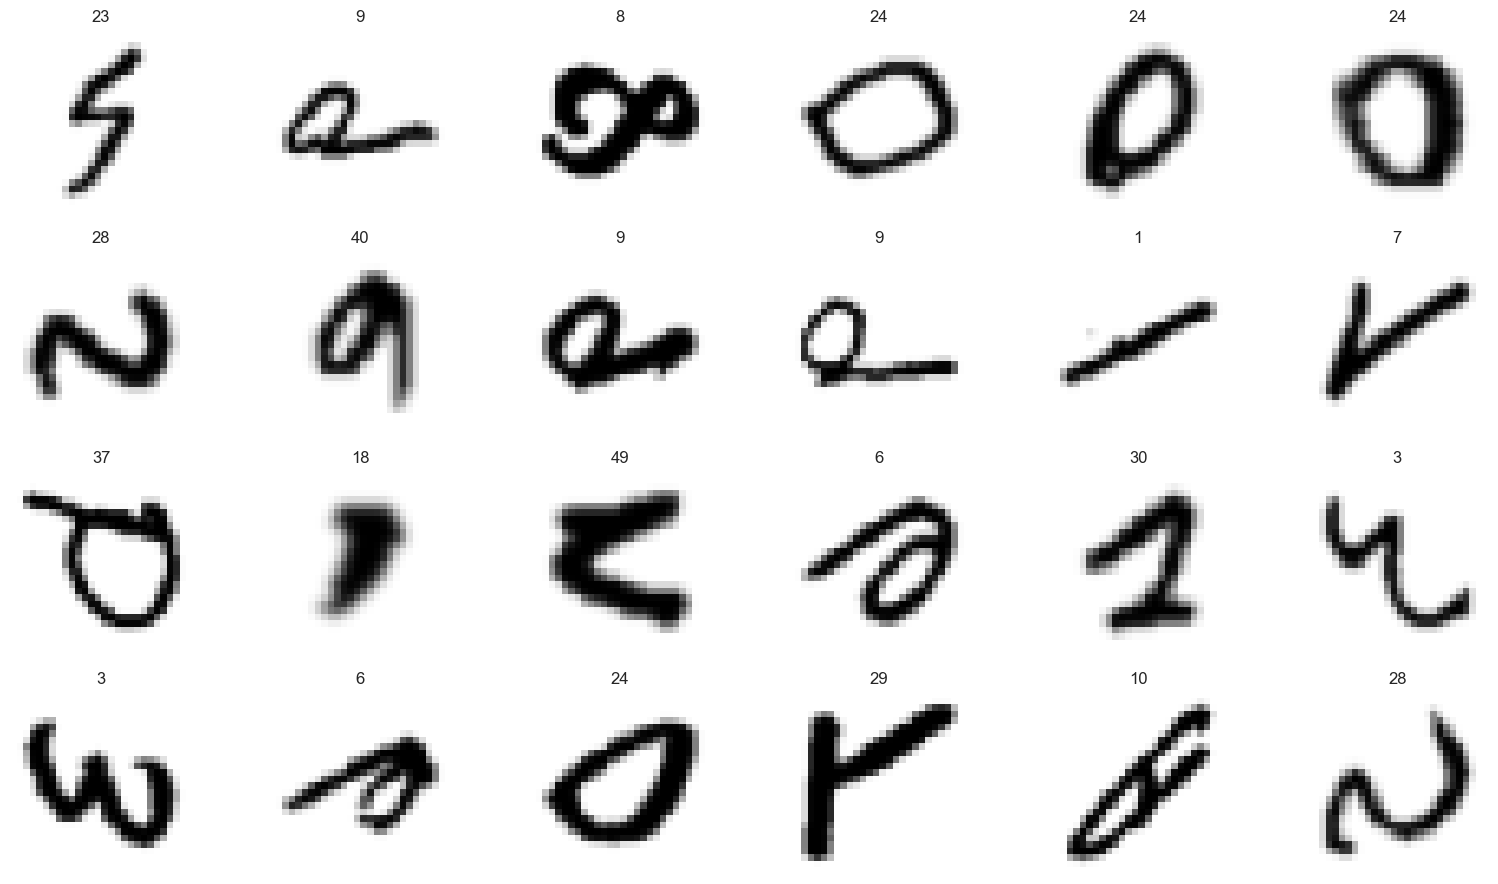

In [5]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

emnist = loadmat("Resources/emnist-byclass.mat").get('dataset')

eminst_data = np.vstack((emnist[0,0][0][0,0][0], emnist[0,0][1][0,0][0]))
eminst_target = np.vstack((emnist[0,0][0][0,0][1], emnist[0,0][1][0,0][1])).reshape(-1)

sns.set(font_scale=1)


index = np.random.choice(np.arange(len(eminst_data)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), eminst_data[index], eminst_target[index]):
    axes, image, target = item
    axes.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([]) 
    axes.set_title(target)
plt.tight_layout()

In [9]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

X_train, X_test, y_train, y_test = train_test_split(eminst_data, 
                                                    eminst_target, 
                                                    train_size=0.8,
                                                    stratify=eminst_target,
                                                    random_state=11
                                                    );

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.1,
                                                  stratify=y_train,
                                                  random_state=11
                                                );


X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32') / 255


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform', padding='same')) 
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform',  padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same')) 

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same')) 
cnn.add(MaxPooling2D(pool_size=(2, 2))) 
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
               kernel_initializer='he_uniform',  padding='same'))
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', 
               kernel_initializer='he_uniform',  padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))   
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=62, activation='softmax'))

opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [18]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

history = cnn.fit(X_train, y_train, 
                  epochs=10, 
                  batch_size=64,
                  validation_data=(X_val, y_val),
                  verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

cnn.save('emnist_cnn.h5')

5090/5090 [==============================] - 102s 20ms/step - loss: 0.3470 - accuracy: 0.8697

Accuracy: 86.971527%
loss: 34.697405%


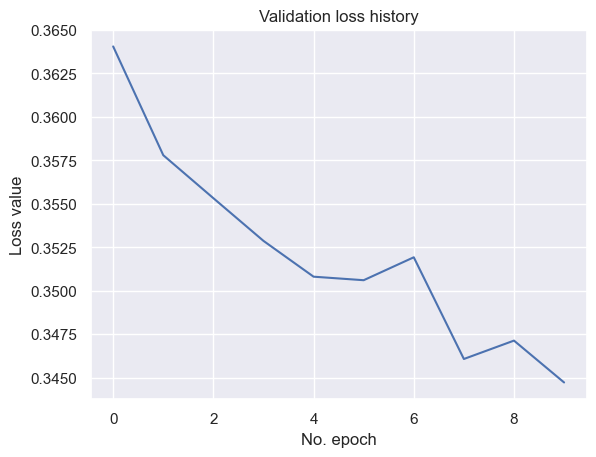

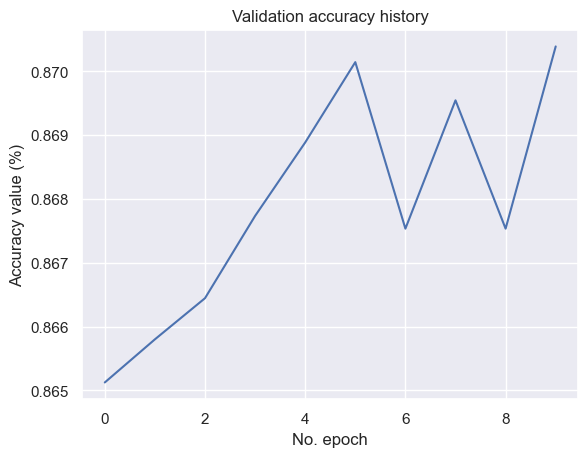

In [19]:
#Exercise 16.19: EMNIST Handwritten Digits and Characters 

sns.set(font_scale=1)
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

16. 20 ***(Project: Predicting EMNIST Digits with a Pretrained MNIST Model)*** For this
exercise, load the digits subset of EMNIST, which contains 280,000 digit images. Load
the MNIST convnet model you trained in this chapter then use it to evaluate the prediction accuracy for the EMNIST digits. How accurate is your model with EMNIST?

In [20]:
#Exercise 16.20: Predicting EMNIST Digits with a Pretrained MNIST Model

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat

import numpy as np

digits_dataset = loadmat('emnist-digits.mat').get('dataset')
cnn = load_model('mnist_cnn.h5')


X_test = np.vstack((digits_dataset[0,0][0][0,0][0], digits_dataset[0,0][1][0,0][0])).reshape((-1, 28, 28, 1))
y_test = np.vstack((digits_dataset[0,0][0][0,0][1], digits_dataset[0,0][1][0,0][1])).reshape(-1)

X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

8750/8750 [==============================] - 64s 7ms/step - loss: 9.2448 - accuracy: 0.1964

Accuracy: 19.643928%
loss: 924.478722%


16. 21 ***(Project: Predicting MNIST Digits with a Pretrained EMNIST Model)*** For this
exercise, load Keras's MNIST dataset and the EMNIST convnet model for both characters
and digits you trained in Exercise 16.19. How accurate is your EMNIST model at predicting MNIST's digits?.

In [ ]:
#Exercise 16.21: Predicting MNIST Digits with a Pretrained EMNIST Model

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()
cnn = load_model('emnist_cnn.h5')

X_test = np.vstack((X_train, X_test)).reshape((-1, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_test = np.hstack((y_train, y_test))
y_test = to_categorical(y_test)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')


16. 22 ***(Project: Transfer Learning with MNIST and EMNIST Digits)*** Use scikit-learn's
*train_test_split* function to split the digits subset of EMNIST into training (70%), validation (10%) and testing (20%) sets. Load the MNIST convnet model you trained in this
chapter, then use its fit method to continue training the model with the EMNIST training set you created. Pass the validation set to fit via the validation_data argument. 
Evaluate the updated model with the testing data. How accurate is your model compared
to the previous exercise?.

In [49]:
#Exercise 16.22: Transfer Learning with MNIST and EMNIST Digits

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np

digits_dataset = loadmat('emnist-digits.mat').get('dataset')
cnn = load_model('mnist_cnn.h5')


In [50]:
#Exercise 16.22: Transfer Learning with MNIST and EMNIST Digits

digits_data = np.vstack((digits_dataset[0,0][0][0,0][0], digits_dataset[0,0][1][0,0][0]))
digits_target = np.vstack((digits_dataset[0,0][0][0,0][1], digits_dataset[0,0][1][0,0][1])).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_target, 
                                                    train_size=0.8,
                                                    random_state=22
                                                    );

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.1,
                                                  random_state=22
                                                );


X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [51]:
#Exercise 16.22: Transfer Learning with MNIST and EMNIST Digits

cnn.fit(X_train, y_train, 
                  epochs=22, 
                  batch_size=32,
                  validation_data=(X_val, y_val),
                  verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

1750/1750 [==============================] - 28s 16ms/step - loss: 0.0556 - accuracy: 0.9947

Accuracy: 99.467856%
loss: 5.556710%


16. 23 ***(Project: Binary Classification—Cats vs. Dogs)*** Research and download Cats vs. Dogs dataset and study deep learning models that use it. Implement your own deep-learning convnet that performs binary-classification using the techniques presented in this chapter. How well does your convnet predict whether an image is a cat or a dog compared to the other Cats vs. Dogs convnets you studied?

In [9]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

from tensorflow.keras.preprocessing.image import load_img,  img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

# Pre-Process Photo Sizes: load dogs vs cats dataset, reshape and save to a new file #

FOLDER: str = 'dog-vs-cat-dataset/' # location of dataset

photos, targets = list(), list()

for file in listdir(FOLDER):
	
	photo = load_img(FOLDER + file, target_size=(200, 200)) # load image
	photo = img_to_array(photo) # convert to numpy array
	target = 1.0 if file.startswith('dog') else 0.0 # determine class

	photos.append(photo)
	targets.append(target)


photos = np.asarray(photos)
targets = np.asarray(targets)
print(f'Photos shape: {photos.shape}; Target Shape: {targets.shape}')

# np.save('dogs_vs_cats_photos.npy', photos) # save the reshaped photos
# np.save('dogs_vs_cats_targets.npy', targets) # save the labels

Photos shape: (25000, 200, 200, 3); Target Shape: (25000,)


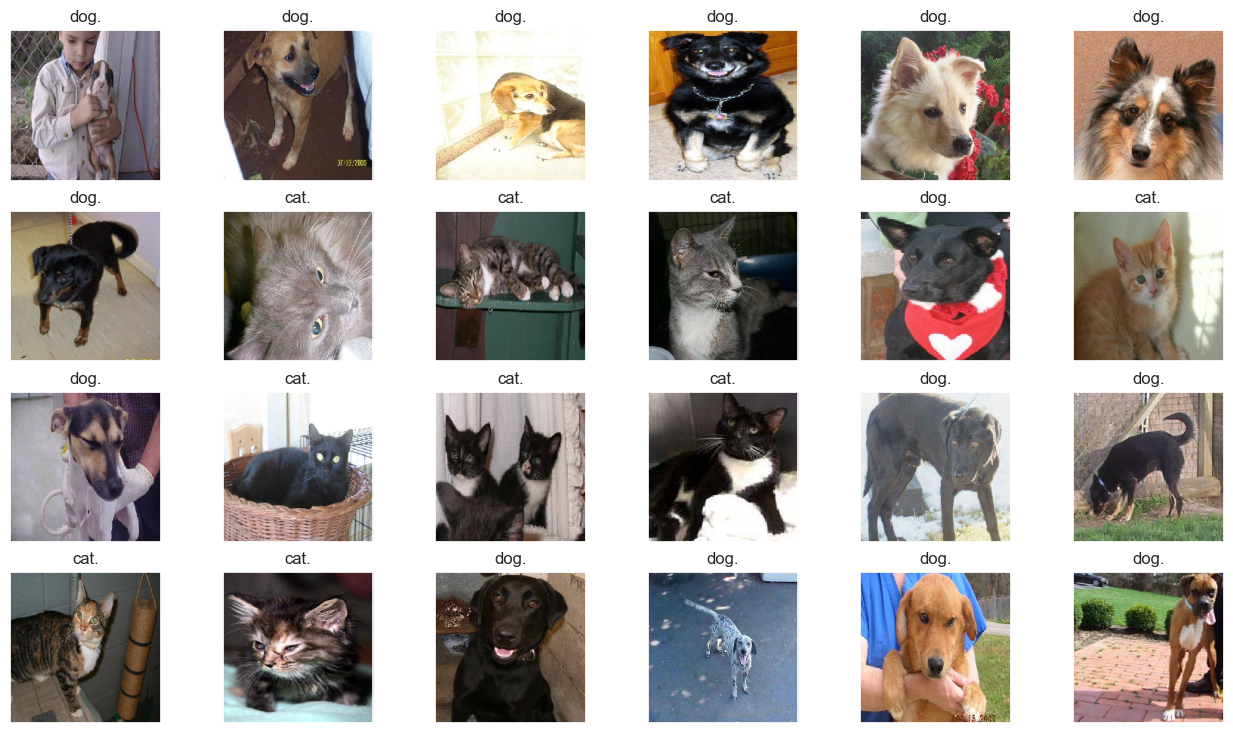

In [4]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

sns.set(font_scale=1)?

# plot dog and cat photos  #
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

index = np.random.randint(low=0, high=photos.shape[0], size=24)

for item in zip(axes.ravel(), photos[index], targets[index]):
    axes, image, target = item
    axes.imshow(image.astype('int'), cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title('dog.' if target else 'cat.')

In [10]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

X_train, X_test, y_train, y_test = train_test_split(photos, 
                                                    targets, 
                                                    train_size=0.8,
                                                    shuffle=True,
                                                    random_state=22);

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state=22);
#Normalizing the X_Data
X_train /= 255
X_test /=  255
X_val /=  255


In [54]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

# #### 
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 #######
 
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

history = cnn.fit(X_train, y_train, 
                  epochs=10, 
                  batch_size=64,
                  validation_data=(X_val, y_val),
                  verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

157/157 [==============================] - 53s 338ms/step - loss: 0.6313 - accuracy: 0.6392

Accuracy: 63.919997%
loss: 63.130432%


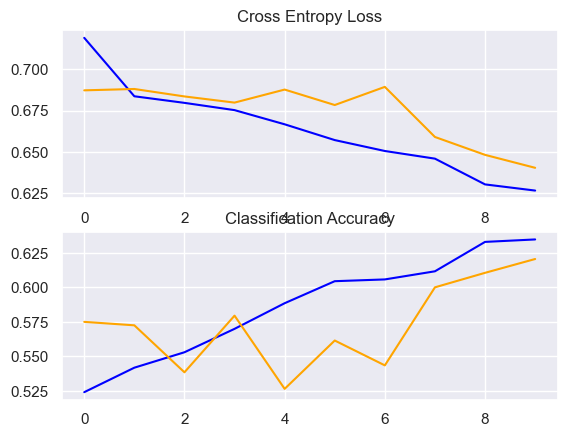

In [56]:
#Exercise 16.23: Binary Classification—Cats vs. Dogs

 # plot loss and accuracy #
 
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

16. 24 ***(Project: Predicting Image Classes with Pretrained Keras Convnet Models)*** As we mentioned in Section 16.11, Keras comes with several pretrained convnet models. Investigate these online. Load one or more of the models as shown at https://keras.io/ and use them to predict the classes of objects in your own images.

In [1]:
#Exercise 16.24: Predicting Image Classes with Pretrained Keras Convnet Models

from tensorflow.keras.preprocessing.image import load_img,  img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

from os import listdir
import numpy as np

In [2]:
#Exercise 16.24: Predicting Image Classes with Pretrained Keras Convnet Models

FOLDER: str = 'dog-vs-cat-dataset/' 

photos, targets = list(), list()

for file in listdir(FOLDER):
	
	photo = load_img(FOLDER + file, target_size=(224, 224)) 
	photo = img_to_array(photo) 
	target = 1.0 if file.startswith('dog') else 0.0 

	photos.append(photo)
	targets.append(target)


photos = preprocess_input(np.asarray(photos))
targets = np.asarray(targets)



In [3]:
#Exercise 16.24: Predicting Image Classes with Pretrained Keras Convnet Models


X_train, X_test, y_train, y_test = train_test_split(photos, 
                                                    targets, 
                                                    train_size=0.80,
                                                    shuffle=True,
                                                    random_state=22);

X_train /= 255
X_test /=  255

In [4]:
#Exercise 16.24: Predicting Image Classes with Pretrained Keras Convnet Models

# load model #
cnn = VGG16(weights='imagenet', 
            include_top=False, 
            input_shape=(224, 224, 3)
            );


for layer in cnn.layers:
    layer.trainable = False # mark loaded layers as not trainable
    
# add new classifier layers
flat1 = Flatten()(cnn.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)

# define new cnn
cnn = Model(inputs=cnn.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])




In [8]:
history = cnn.fit(X_train, y_train, 
                  epochs=10, 
                  batch_size=64,
                  validation_split=0.1,
                  verbose=0)

loss, accuracy = cnn.evaluate(X_test, y_test)

print(f'\nAccuracy: {accuracy:3%}')
print(f'loss: {loss:3%}')

157/157 [==============================] - 712s 5s/step - loss: 0.1328 - accuracy: 0.9468

Accuracy: 94.679999%
loss: 13.284458%
